In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [32]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Xiao zi you zhong,1982
1,Afraid to Speak,2016
2,Haanduk: The Hidden Corner,2016
3,Akka Pettanam Chelleli Kapuram,1993
4,Ordynat Michorowski,1937


In [33]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [34]:
c = cast
t = titles

In [35]:
#c = cast.set_index(['title', 'year']).sort_index()
#c.head()

In [36]:
%%time
#c.loc['Sleuth'].loc[1972]
#c.loc[('Sleuth', 1972)]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 16.9 µs


In [37]:
# year becomes a part of the data again
#c.loc[('Sleuth', 1972)].reset_index('year')

In [67]:
c1 = c[c.name == 'George Clooney']
#c1.groupby('year').size().plot(style='*', ylim=0)
#c1.groupby('year').n.min()

# question - how to do this if column name is >1 word?
c1.groupby(c.year//10*10).n.size()

year
1980     3
1990    14
2000    20
2010    10
Name: n, dtype: int64

### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

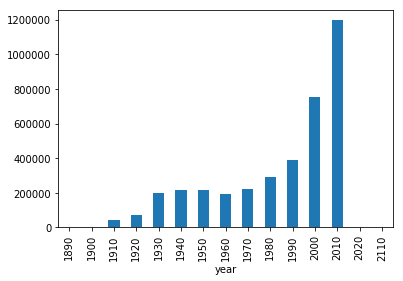

In [78]:
c.groupby(c.year//10*10).size().plot('bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

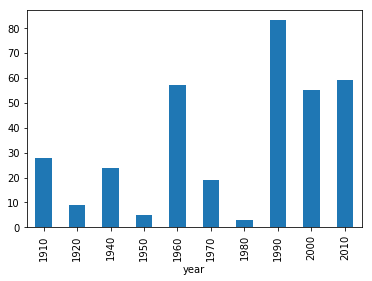

In [77]:
c[c.title == 'Hamlet'].groupby(c.year//10*10).size().plot('bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [82]:
c[(c.n == 1) & (c.type == 'actor') & (c.year >= 1950) & (c.year <1960)].groupby('year').size()

year
1950    625
1951    651
1952    613
1953    664
1954    636
1955    648
1956    668
1957    739
1958    715
1959    733
dtype: int64

In [83]:
c[(c.n == 1) & (c.type == 'actress') & (c.year >= 1950) & (c.year <1960)].groupby('year').size()

year
1950    288
1951    285
1952    304
1953    312
1954    316
1955    285
1956    307
1957    315
1958    301
1959    327
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [86]:
c[(c.n <= 5) & (c.type == 'actor') & (c.year >= 1950) & (c.year <1960)].groupby(['year', 'n']).size()

year  n  
1950  1.0    625
      2.0    441
      3.0    507
      4.0    535
      5.0    561
1951  1.0    651
      2.0    461
      3.0    561
      4.0    582
      5.0    582
1952  1.0    613
      2.0    440
      3.0    544
      4.0    533
      5.0    551
1953  1.0    664
      2.0    473
      3.0    577
      4.0    578
      5.0    574
1954  1.0    636
      2.0    415
      3.0    549
      4.0    540
      5.0    524
1955  1.0    648
      2.0    430
      3.0    564
      4.0    551
      5.0    550
1956  1.0    668
      2.0    483
      3.0    560
      4.0    557
      5.0    552
1957  1.0    739
      2.0    489
      3.0    617
      4.0    609
      5.0    607
1958  1.0    715
      2.0    498
      3.0    596
      4.0    578
      5.0    587
1959  1.0    733
      2.0    510
      3.0    579
      4.0    600
      5.0    586
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [101]:
c[c.title.str.startswith('The Pink Panther') & c.n.notnull()].sort_values('n').groupby(['title', 'year']).size()

title                           year
The Pink Panther                1963    15
                                2006    51
The Pink Panther 2              2009    36
The Pink Panther Strikes Again  1976    61
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [120]:
g = c[c.name == 'Frank Oz'].groupby(['year', 'title']).size()
g[g>1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [122]:
g1 = c[c.name == 'Frank Oz'].groupby('character').size()
g1[g1>1]

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64